In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt # plotting
from urllib.request import urlopen
import matplotlib.dates as mdates 
from scipy import stats


In [2]:
con = sqlite3.connect("switrs.sqlite")





In [3]:
query = '''SELECT Collision_Date FROM Collisions
           WHERE Collision_Date IS NOT NULL
           
           AND Bicycle_Collision IS NOT 1
            AND Motorcycle_Collision IS NOT 1
            AND Pedestrian_Collision IS NOT 1
            AND Truck_Collision IS NOT 1
    '''

car_crashes = pd.read_sql_query(query, con)




In [4]:
car_crashes.head()

,collision_date
0,2020-03-14
1,2020-07-26
2,2008-01-07
3,2008-01-04
4,2008-01-04


In [5]:
car_crashes['years'] = pd.DatetimeIndex(car_crashes['collision_date']).year

car_crashes


,collision_date,years
0,2020-03-14,2020
1,2020-07-26,2020
2,2008-01-07,2008
3,2008-01-04,2008
4,2008-01-04,2008
...,...,...
7858450,2016-06-12,2016
7858451,2016-05-11,2016
7858452,2016-08-15,2016
7858453,2016-08-18,2016


In [6]:
car_crashes2 = car_crashes.groupby('years').count()

car_crashes2.head()


,collision_date
years,
2001,450038
2002,472783
2003,467003
2004,468322
2005,464738


In [7]:
car_crashes2['ca_pop'] = [34.49, 34.49, 34.88, 35.25, 35.56, 35.98, 36.23, 36.58,36.96,37.32,37.64, 37.95, 38.26, 38.6,38.92, 39.17,39.36, 39.46, 39.51, 39.78]

car_crashes2.head()

,collision_date,ca_pop
years,,
2001,450038,34.49
2002,472783,34.49
2003,467003,34.88
2004,468322,35.25
2005,464738,35.56


Text(0.5, 1.0, 'CA Car Crashes 2001 - 2020')

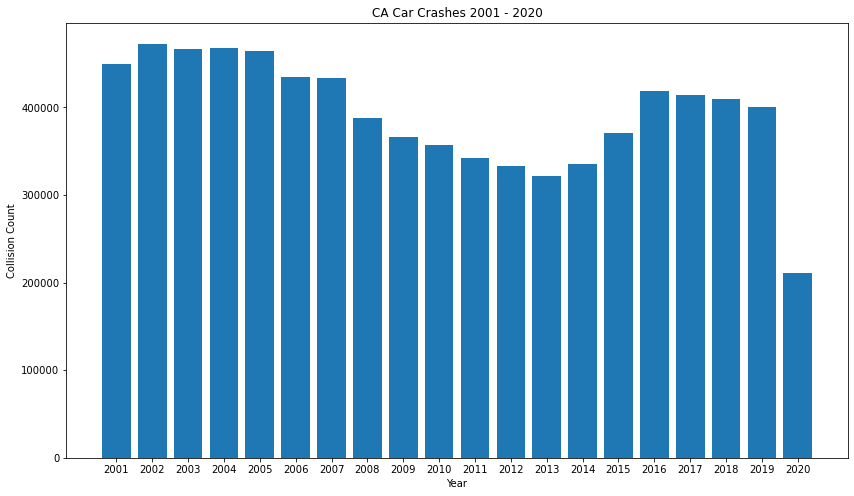

In [8]:
import matplotlib.dates as mdates 
import matplotlib.pyplot as plt 

plt.figure(figsize=(14, 8))
x = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020']
plt.bar(x, height =car_crashes2['collision_date'])


plt.xlabel("Year")
plt.ylabel("Collision Count")
plt.title("CA Car Crashes 2001 - 2020") 
#CA POP taken from: https://www.statista.com/statistics/206097/resident-population-in-california/


In [9]:
x = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020']
#ca_pop = [34.49, 34.49, 34.88, 35.25, 35.56, 35.98, 36.23, 36.58,36.96,37.32,37.64, 37.95, 38.26, 38.6,38.92, 39.17,39.36, 39.46, 39.51, 39.78]

fig = plt.figure() # Create matplotlib figure

ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
car_crashes2['collision_date'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
car_crashes2['ca_pop'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax2.plot(x, car_crashes2['ca_pop'])
ax.plot(x,car_crashes2['collision_date'] )
ax.set_ylabel('Collision Count')
ax2.set_ylabel('Population(M)')

plt.show()
plt.tight_layout()

NameError: name 'ax' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
percent_change = car_crashes2.pct_change().dropna()

percent_change

In [ ]:
plt.figure(figsize=(12,5))
x = ['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019','2020']
plt.plot(x, percent_change["ca_pop"], color='blue', label = "CA Population ROC")
plt.plot(x, percent_change["collision_date"], color='green', label = "Collision ROC")


plt.xlabel("party_age")
plt.ylabel("rate of change")
#plt.xlim([0, 120])
plt.title("CA Pop/Collision Rate of Change")
plt.legend()


In [ ]:
#rate of change flat for CA pop; rate of change for collisions drop 2008 and climb from 2013 to 2016
-possible reasons could be safer vehicles, safety standard for vehicle much higher than previously, standards for child 
safety; carpooling was big in the 2000s


Null Hyp: no correlation b/t population change and # collisions
Alt Hyp: there is a correlation b/t pop change and # collisions


In [ ]:
correlation = stats.spearmanr(percent_change["ca_pop"], percent_change["collision_date"])
print(correlation)

#P value higher than .05 significance level indicates that we can fail to reject null

In [ ]:
correlation = stats.spearmanr(car_crashes2['collision_date'], car_crashes2['ca_pop'])
print(correlation)